In [2]:
# Allow importing from the code directory.
import sys
sys.path.append('../code/')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from etch import load_census, teska, predict_probabilities, ys, plot_learning_curve


In [4]:
census = load_census()
model = LogisticRegression(max_iter=500, random_state=42)
# ros = RandomOverSampler(random_state=42)
ros = None

In [5]:
pipeline, (X_train_encoded, y_train_encoded), (X_test_encoded, y_test_encoded) = teska(model, census, sampler=ros)


In [6]:
y_train_probabilities = predict_probabilities(pipeline, census.X_train, y_train_encoded)

In [7]:
ys(y_train_encoded, y_train_probabilities, threshold=0.5)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    187141
           1       0.72      0.39      0.50     12382

    accuracy                           0.95    199523
   macro avg       0.84      0.69      0.74    199523
weighted avg       0.95      0.95      0.95    199523

[[185262   1879]
 [  7566   4816]]


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


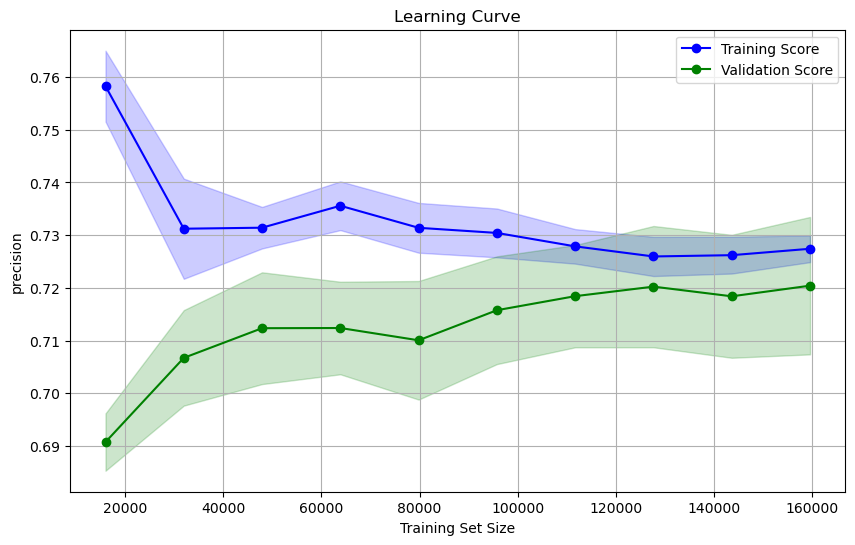

In [8]:
plot_learning_curve(pipeline, census.X_train, y_train_encoded, scoring='precision', save_path='../results/learning_curve.png')


In [9]:
y_test_predictions = pipeline.predict(census.X_test)


In [10]:
print(classification_report(y_test_encoded, y_test_predictions))
confusion_matrix(y_test_encoded, y_test_predictions)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     93576
           1       0.74      0.39      0.51      6186

    accuracy                           0.95     99762
   macro avg       0.85      0.69      0.74     99762
weighted avg       0.95      0.95      0.95     99762



array([[92711,   865],
       [ 3774,  2412]])